# 例3

## 4、5の場合

以前の意見が次の意見の選び方にどう影響するか

４. 一つ前の意見 + 議題

５. 二つ前までの意見

この二つの場合に共通なのは、参照する点が2つであるというところである。

では、この場合についてもシミュレーションを考えていくことにする。意見の選ばれ方は、2,3の場合と同じく、意見の$a$次元ユークリッド距離の大きさによって決める。この二つの意見の間の重みをどうするかというのが議論となる。すなわち、2つ前の意見に影響されるとはいえ、直前の意見よりは影響されないであろう、という考えや、一つ前の意見が参考にされるとはいえ、実際に会議をしている際に望まれるのは議題に沿った発言であるから、むしろ議題の方に重みを置いたほうが良いのではないか、という考えを反映した指標は何を用いるべきかということである。

したがって、この3点間の近さの指標として次のようなものが考えられる。

$$D(x,(y,z)) \equiv \alpha d(x,y) + \beta d(x,z)\ \ (\alpha, \beta > 0)$$

以下に具体的に同じ長さ$a$に対して$\alpha$と$\beta$によってどう変わるかを描いた。

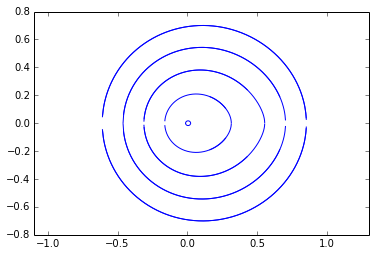

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean as euc
from IPython.html.widgets import interactive
from IPython.display import display

beta = 1.
x1 = (0., 0.)
x2 = (0.5, 0.)
r = euc(x1, x2)
A = np.linspace(1.1*r, 6*r, 5) # larger than r
def oval(alpha=1.1):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal', 'datalim')
    for a in A:
        d1 = np.linspace(r/2., a/alpha, 1000)
        d2 = np.linspace(r/2., a/beta, 1000)
        theta1 = np.arccos((d1**2 + r**2 - ((a-alpha*d1)/beta)**2)/(2*d1*r))
        theta2 = np.pi - np.arccos((d2**2 + r**2 - ((a-beta*d2)/alpha)**2)/(2*d2*r))
        ax.plot(x1[0] + d1*np.cos(theta1), x1[1] + d1*np.sin(theta1), 'b')
        ax.plot(x1[0] + d1*np.cos(theta1), x1[1] + -d1*np.sin(theta1), 'b')
        ax.plot(x2[0] + d2*np.cos(theta2), x2[1] + d2*np.sin(theta2), 'b')
        ax.plot(x2[0] + d2*np.cos(theta2), x2[1] + -d2*np.sin(theta2), 'b')
    plt.show()

w = interactive(oval, alpha=(1., 5., 0.1))
display(w)

また、別の近さの指標として、ベクトル$\vec{Y}=y-x, \vec{Z} = z-x$として、

$$D(x, (y,z)) \equiv | t \vec{Y} + (1-t)\vec{Z}|\ \ (0 \le t \le 1)$$

とする方法もある。このとき、右辺の括弧の内部があらわすベクトルは、点$y$,$z$を結んだ線分$YZ$を$(1-t):t$に内分する点のベクトルを示しており、$D$はその点からのユークリッド距離をあらわすことになる。

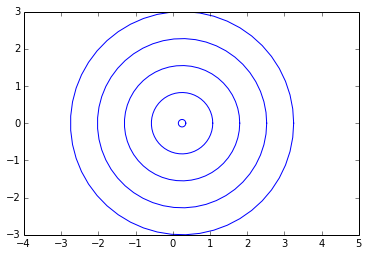

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean as euc
from IPython.html.widgets import interactive
from IPython.display import display

x1 = np.array((0., 0.))
x2 = np.array((0.5, 0.))
def circle(t=0.5):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal', 'datalim')
    c = t*x1 + (1.-t)*x2
    r = np.linspace(0.1, 3, 5)
    theta = np.linspace(0., 2.*np.pi, endpoint=True)
    
    for _r in r:
        ax.plot(c[0] + _r*np.cos(theta), c[1] + _r*np.sin(theta), 'b')
    plt.show()

w = interactive(circle, t=(0.1, 1.0, 0.1))
display(w)

In [1]:
%matplotlib inline
import numpy as np
from scipy.spatial.distance import euclidean as euc
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins
from mpld3.utils import get_id


class Person:

    def __init__(self, S, a, p=0.5):
        self.S = S
        self.a = a
        self.p = p

    def gather(self):
        """make person to participate the meeting.
        """
        self.ideas = self.has_idea()

    def has_idea(self):
        """a person has self.S ideas with self.a dimension.
        """
        return list(np.random.rand(self.S, self.a))

# ================================================================
    def chose_idea(self, idea, idea2=None):
        def nearness1(x, y, z):
            """calculate nearness of x for (y, z)
            by calculating a linear combination.
            """
            alpha = 1.
            beta = 1.
            return alpha*euc(x, y) + beta*euc(x, z)
        
        def nearness2(x, y, z):
            """calculate nearness of x for (y, z)
            by distance between x and the dividing point of (y, z) with t.
            """
            # t > 0
            # t <= 1: interior division
            t = 0.5 
            x, y, z = np.array(x), np.array(y), np.array(z)
            return euc(t*(y-x) + (1.-t)*(z-x), (0., 0.))
        
        if len(self.ideas) == 0:
            return False
        # return min(d) and its idea_id
        if idea2 == None:
            return min([(euc(vec, idea), idea_id) for idea_id, vec in enumerate(self.ideas)])
        else:
            return min([(nearness1(vec, idea, idea2), idea_id)
                        for idea_id, vec in enumerate(self.ideas)])s
# ================================================================

class Meeting:

    """Simulate a meeting with "simple3" situation.

    Give keyword arguments:

        K = 20 # Time limit
        N = 6 # a number of participants
        S = 10 # a number of ideas for each participants
        a = 2 # the dimension of an idea
        p = 0.5 # probability that a person speak
        draw = True # draw image or don't

    Output:

        self.minutes: list of
                      ( idea(which is vector with a dimension)
                      , who(person_id in the list "self.membes"))
        self.k: stopped time (=len(self.minutes))
    """

    def __init__(self, K=20, N=6, S=10, a=2, p=0.5, case=4, draw=True):
        self.K = K
        self.N = N
        self.S = S
        self.a = a
        self.p = p
        self.draw = draw
        self.case = case  # case in the above cell: 4 or 5
        self.members = []
        self.minutes = []  # list of (idea, who)
        self.k = 0

    def gather_people(self):
        """gather people for the meeting.

        You can edit what ideas they have in here.
        """
        for n in range(self.N):
            person = Person(self.S, self.a, self.p)
            # person.has_idea = some_function()
            # some_function: return list of self.S arrays with dim self.a.
            person.gather()
            self.members.append(person)

    def progress(self):
        """meeting progress
        """
        self.init()
        preidea = self.subject
        prepreidea = None
        self.k = 1
        while self.k < self.K + 1:
            # l: (distance, speaker, idea_id) list for who can speak
            l = []
            for person_id, person in enumerate(self.members):
                # chosed: (distance, idea_id)
                # ====================================================
                chosed = person.chose_idea(preidea, prepreidea)
                # ====================================================
                if chosed:
                    l.append((chosed[0], person_id, chosed[1]))
            # if no one can speak: meeting ends.
            if len(l) == 0:
                print "no one can speak."
                break
            i = [(person_id, idea_id)
                 for distance, person_id, idea_id in sorted(l)]

            for person_id, idea_id in i:
                rn = np.random.rand()
                if rn < self.members[person_id].p:
                    idea = self.members[person_id].ideas.pop(idea_id)
                    self.minutes.append((idea, person_id))
                    if self.case == 5:
                        # =================================
                        prepreidea = preidea
                        preidea = idea
                    else:
                        prepreidea = idea
                        # =================================
                    self.callback()
                    self.k += 1
                    break
            else:
                self.minutes.append((self.subject, self.N))
                self.callback()
                self.k += 1

        self.after()

    def init(self):
        self.gather_people()
        self.subject = np.random.rand(self.a)
        self.minutes.append((self.subject, self.N))
        if self.draw:
            self.fig = plt.figure(figsize=(9, 9))
            self.ax = self.fig.add_subplot(1, 1, 1)
            self.labels = ['subject']
            self.s1 = [self.ax.scatter(self.subject[0], self.subject[1],
                                       c=next(self.ax._get_lines.color_cycle))]
            self.ax.text(
                self.subject[0], self.subject[1], '0', fontsize=5)
            for i, member in enumerate(self.members):
                x = [vec[0] for vec in member.ideas]
                y = [vec[1] for vec in member.ideas]
                s = self.ax.scatter(
                    x, y, c=next(self.ax._get_lines.color_cycle), alpha=0.2)
                self.labels.append(str(i))
                self.s1.append(s)

    def callback(self):
        if self.draw:
            if self.minutes[-1][1] == self.N or self.minutes[-2][1] == self.N:
                alpha = 0.2
            else:
                alpha = 1.0
            ix = self.minutes[-2][0][0]
            iy = self.minutes[-2][0][1]
            jx = self.minutes[-1][0][0]
            jy = self.minutes[-1][0][1]
            l1 = self.ax.plot([ix, jx], [iy, jy], color='black', alpha=alpha)
            self.ax.text(jx, jy, '%d' % self.k, color='blue', fontsize=12)
        else:
            pass

    def after(self):
        if self.draw:
            plugins.connect(
                self.fig, plugins.InteractiveLegendPlugin(
                    self.s1, self.labels, ax=self.ax))
            mpld3.enable_notebook()
        else:
            print meeting.minutes

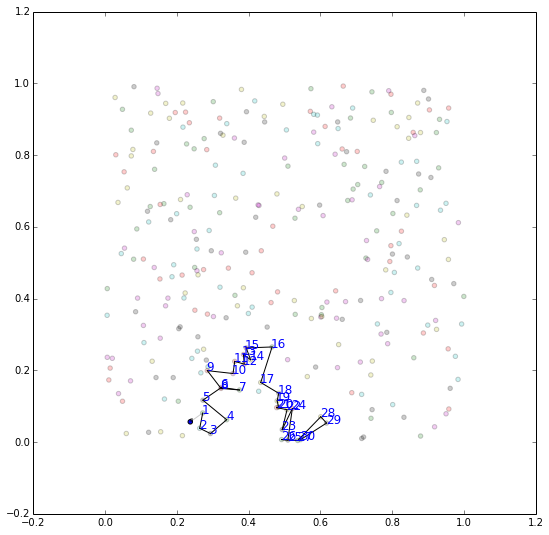

In [3]:
meeting = Meeting(K=30, N=6, S=50, a=2, p=0.6, case=5)
meeting.progress()

見られる性質について(観察)

二つ前の結果まで参照するので、全体の描く軌跡の大きさは、一つ前のみの点を参照してシミュレーションを行った場合よりも小さくなる。

戻りの効果が強くなるので、2のケースに比べると同じ$p$でもギザギザした軌道になっているように見える。